In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data/train.csv', index_col='date', parse_dates=True)

df.head()

id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

In [17]:
test_df = pd.read_csv('./data/test.csv', index_col='date', parse_dates=True)

test_df.head()

id  store_nbr      family  onpromotion
date                                                   
2017-08-16  3000888          1  AUTOMOTIVE            0
2017-08-16  3000889          1   BABY CARE            0
2017-08-16  3000890          1      BEAUTY            2
2017-08-16  3000891          1   BEVERAGES           20
2017-08-16  3000892          1       BOOKS            0

In [18]:
df.tail()

id  store_nbr                      family     sales  \
date                                                                   
2017-08-15  3000883          9                     POULTRY   438.133   
2017-08-15  3000884          9              PREPARED FOODS   154.553   
2017-08-15  3000885          9                     PRODUCE  2419.729   
2017-08-15  3000886          9  SCHOOL AND OFFICE SUPPLIES   121.000   
2017-08-15  3000887          9                     SEAFOOD    16.000   

            onpromotion  
date                     
2017-08-15            0  
2017-08-15            1  
2017-08-15          148  
2017-08-15            8  
2017-08-15            0

<AxesSubplot:xlabel='family'>

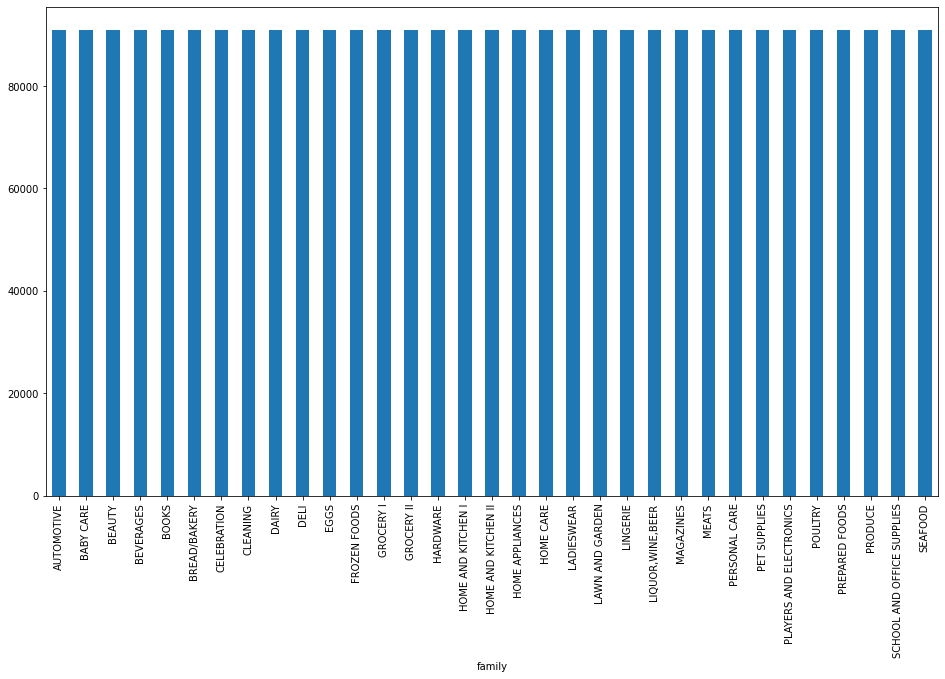

In [19]:
df.groupby('family').size().plot(kind='bar', figsize=(16,9))

<AxesSubplot:xlabel='store_nbr'>

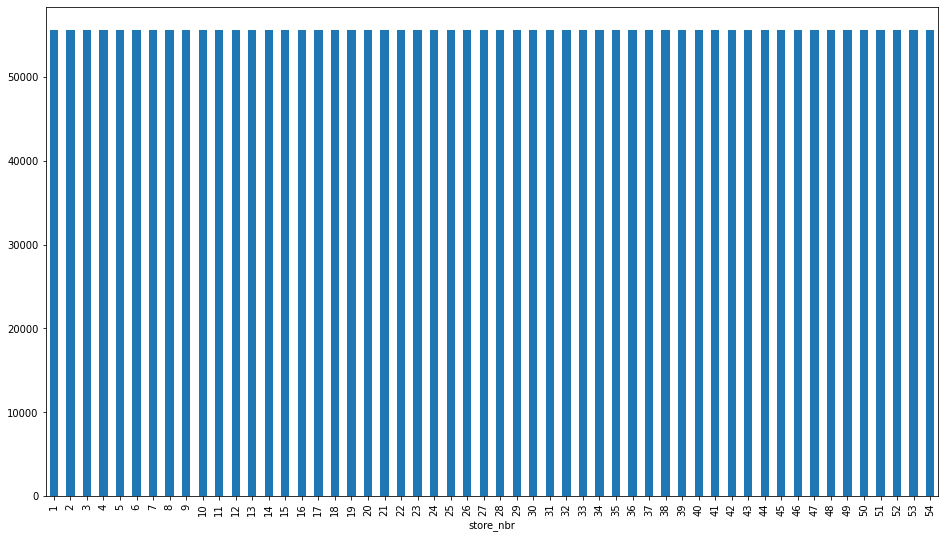

In [20]:
df.groupby('store_nbr').size().plot(kind='bar', figsize=(16,9))

In [21]:
families = df.groupby('family').size().index

family_dfs = []
for family in families:
    family_sub_df = df[df.family == family][['sales']].resample('D').sum().rename(columns={
        'sales': family
    })

    family_dfs.append(family_sub_df)

per_family_df = pd.concat(family_dfs, axis=1)

per_family_df.head()


AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  BREAD/BAKERY  \
date                                                                        
2013-01-01         0.0        0.0     2.0      810.0    0.0     180.58900   
2013-01-02       255.0        0.0   207.0    72092.0    0.0   26246.31900   
2013-01-03       161.0        0.0   125.0    52105.0    0.0   18456.48002   
2013-01-04       169.0        0.0   133.0    54167.0    0.0   16721.96901   
2013-01-05       342.0        0.0   191.0    77818.0    0.0   22367.76108   

            CELEBRATION  CLEANING    DAIRY         DELI  ...  MAGAZINES  \
date                                                     ...              
2013-01-01          0.0     186.0    143.0     71.09000  ...        0.0   
2013-01-02          0.0   74629.0  23381.0  15754.50000  ...        0.0   
2013-01-03          0.0   55893.0  18001.0  11172.45500  ...        0.0   
2013-01-04          0.0   52064.0  18148.0  10143.20900  ...        0.0   
2013-01-05          0.0   70128.0  23082.0  13734.94501  ...        0.0   

                   MEATS  PERSONAL CARE  PET SUPPLIES  \
date                                                    
2013-01-01    110.801000           25.0           0.0   
2013-01-02  20871.464028        17204.0           0.0   
2013-01-03  16597.398113        12568.0           0.0   
2013-01-04  21625.963055        11303.0           0.0   
2013-01-05  20879.091050        16819.0           0.0   

            PLAYERS AND ELECTRONICS       POULTRY  PREPARED FOODS  PRODUCE  \
date                                                                         
2013-01-01                      0.0     42.637000       37.847000      0.0   
2013-01-02                      0.0  13975.884938     5338.111976      0.0   
2013-01-03                      0.0  10674.393983     3591.388005      0.0   
2013-01-04                      0.0  10772.515038     4472.965990      0.0   
2013-01-05                      0.0  13475.009055     5830.073020      0.0   

            SCHOOL AND OFFICE SUPPLIES      SEAFOOD  
date                                                 
2013-01-01                         0.0     0.000000  
2013-01-02                         0.0  1526.750002  
2013-01-03                         0.0  1094.310994  
2013-01-04                         0.0  1293.120995  
2013-01-05                         0.0  1245.637004  

[5 rows x 33 columns]

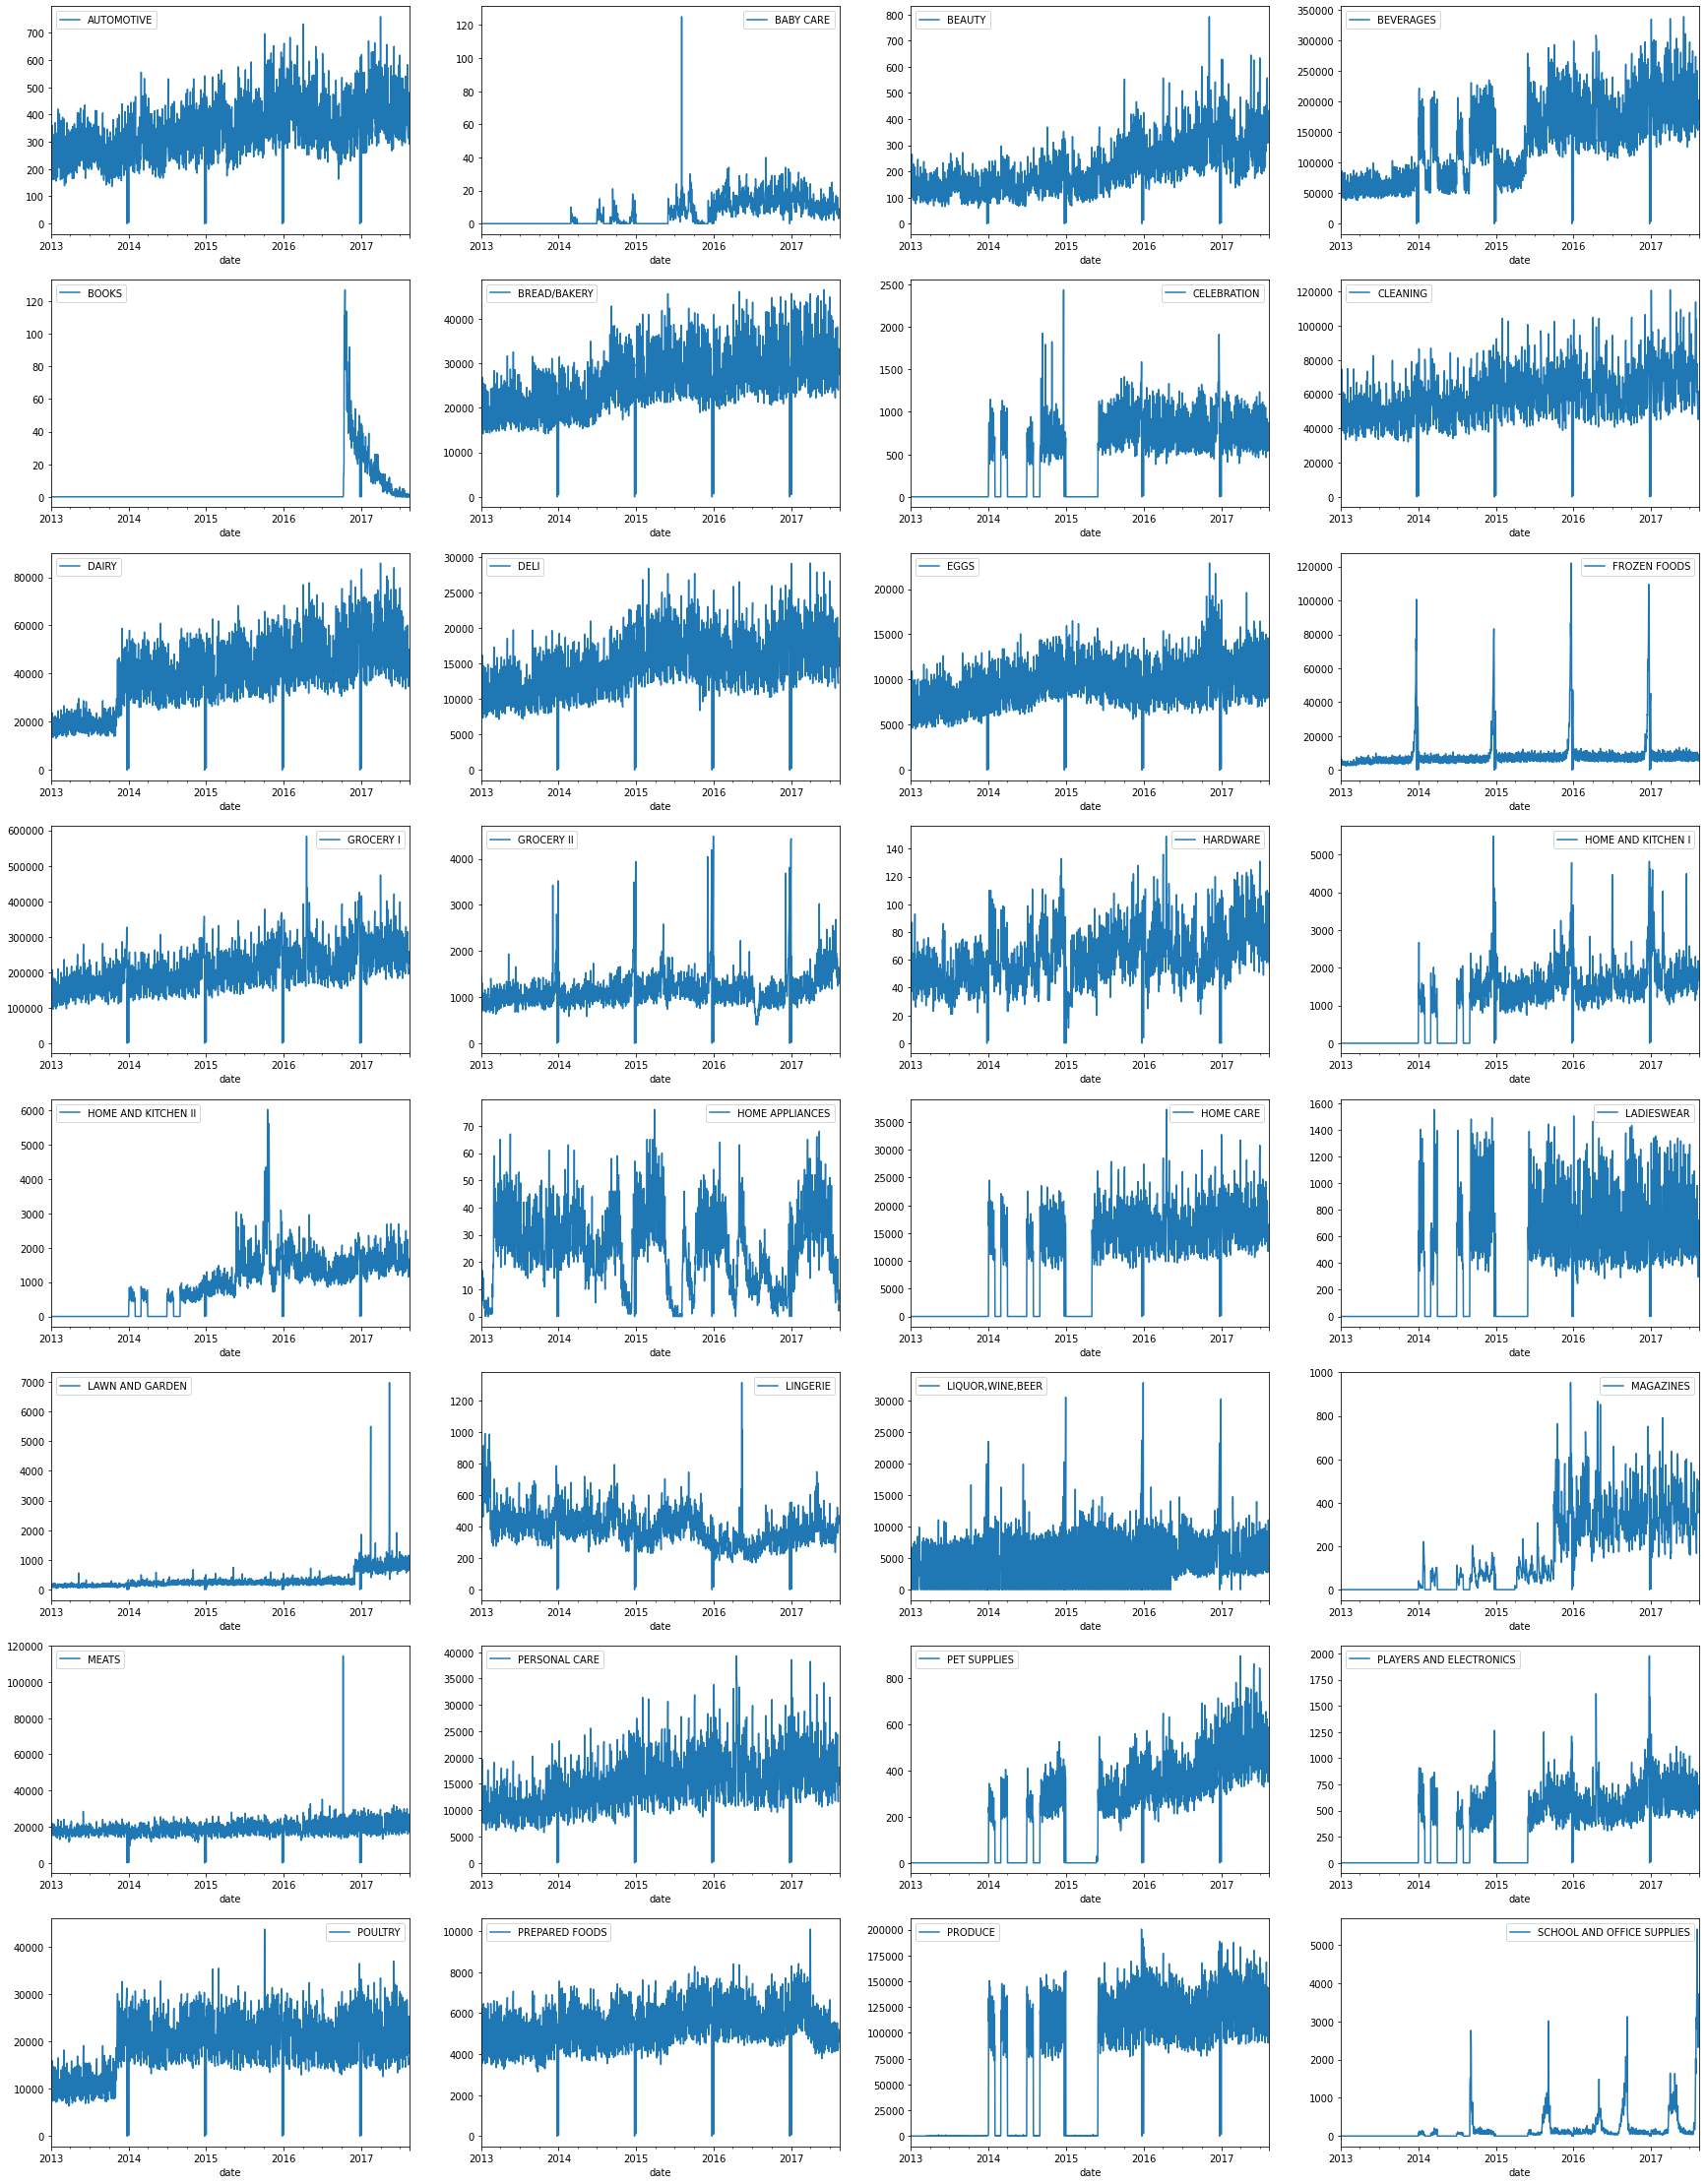

In [22]:
fig, rows = plt.subplots(nrows=8, ncols=4, figsize=(30,40))
axes = [ax for row in rows for ax in row]
for ax, family in zip(axes, per_family_df.columns):
    per_family_df[[family]].plot(ax=ax)

In [23]:
stores = df.groupby('store_nbr').size().index

store_dfs = []
for store in stores:
    store_sub_df = df[df.store_nbr == store][['sales']].resample('D').sum().rename(columns={
        'sales': f'store_{store}'
    })

    store_dfs.append(store_sub_df)

per_store_df = pd.concat(store_dfs, axis=1)

per_store_df.head()

store_1       store_2       store_3       store_4  \
date                                                                
2013-01-01     0.000000      0.000000      0.000000      0.000000   
2013-01-02  7417.148000  10266.718981  24060.348000  10200.083980   
2013-01-03  5873.244001   7612.540000  18570.745025   7400.245000   
2013-01-04  5919.879001   7526.377000  17392.097995   6902.050001   
2013-01-05  6318.785010   9539.566000  22700.872005   9948.383000   

                 store_5       store_6       store_7      store_8    store_9  \
date                                                                           
2013-01-01      0.000000      0.000000      0.000000      0.00000      0.000   
2013-01-02  10598.619020  13520.485002  11997.502000  14659.32800  15867.484   
2013-01-03   7770.968000   9929.393000   9277.958000  10781.24300  10431.719   
2013-01-04   7347.641991   8869.211980   8096.573018  11124.65100   8085.159   
2013-01-05   8192.598000  12431.689040   8610.605999  14277.69902  13057.110   

              store_10  ...      store_45     store_46      store_47  \
date                    ...                                            
2013-01-01     0.00000  ...      0.000000      0.00000      0.000000   
2013-01-02  5430.08800  ...  27612.050950  27149.92000  27263.111010   
2013-01-03  4549.52998  ...  17377.980970  15751.35500  18340.205000   
2013-01-04  3381.01600  ...  19936.195040  17073.06408  18982.008970   
2013-01-05  5409.78501  ...  27104.223034  27231.19803  26996.263995   

                store_48   store_49     store_50      store_51  store_52  \
date                                                                       
2013-01-01      0.000000      0.000      0.00000      0.000000       0.0   
2013-01-02  19700.000000  16281.845  16576.13200  15134.490990       0.0   
2013-01-03  14350.784030   9909.082  11066.46504  11170.057015       0.0   
2013-01-04  15276.803001  10284.566  12147.44000  12452.326000       0.0   
2013-01-05  22876.474000  13506.025  17930.36400  15046.247000       0.0   

            store_53  store_54  
date                            
2013-01-01       0.0     0.000  
2013-01-02       0.0  4973.285  
2013-01-03       0.0  3901.570  
2013-01-04       0.0  3266.966  
2013-01-05       0.0  4394.549  

[5 rows x 54 columns]

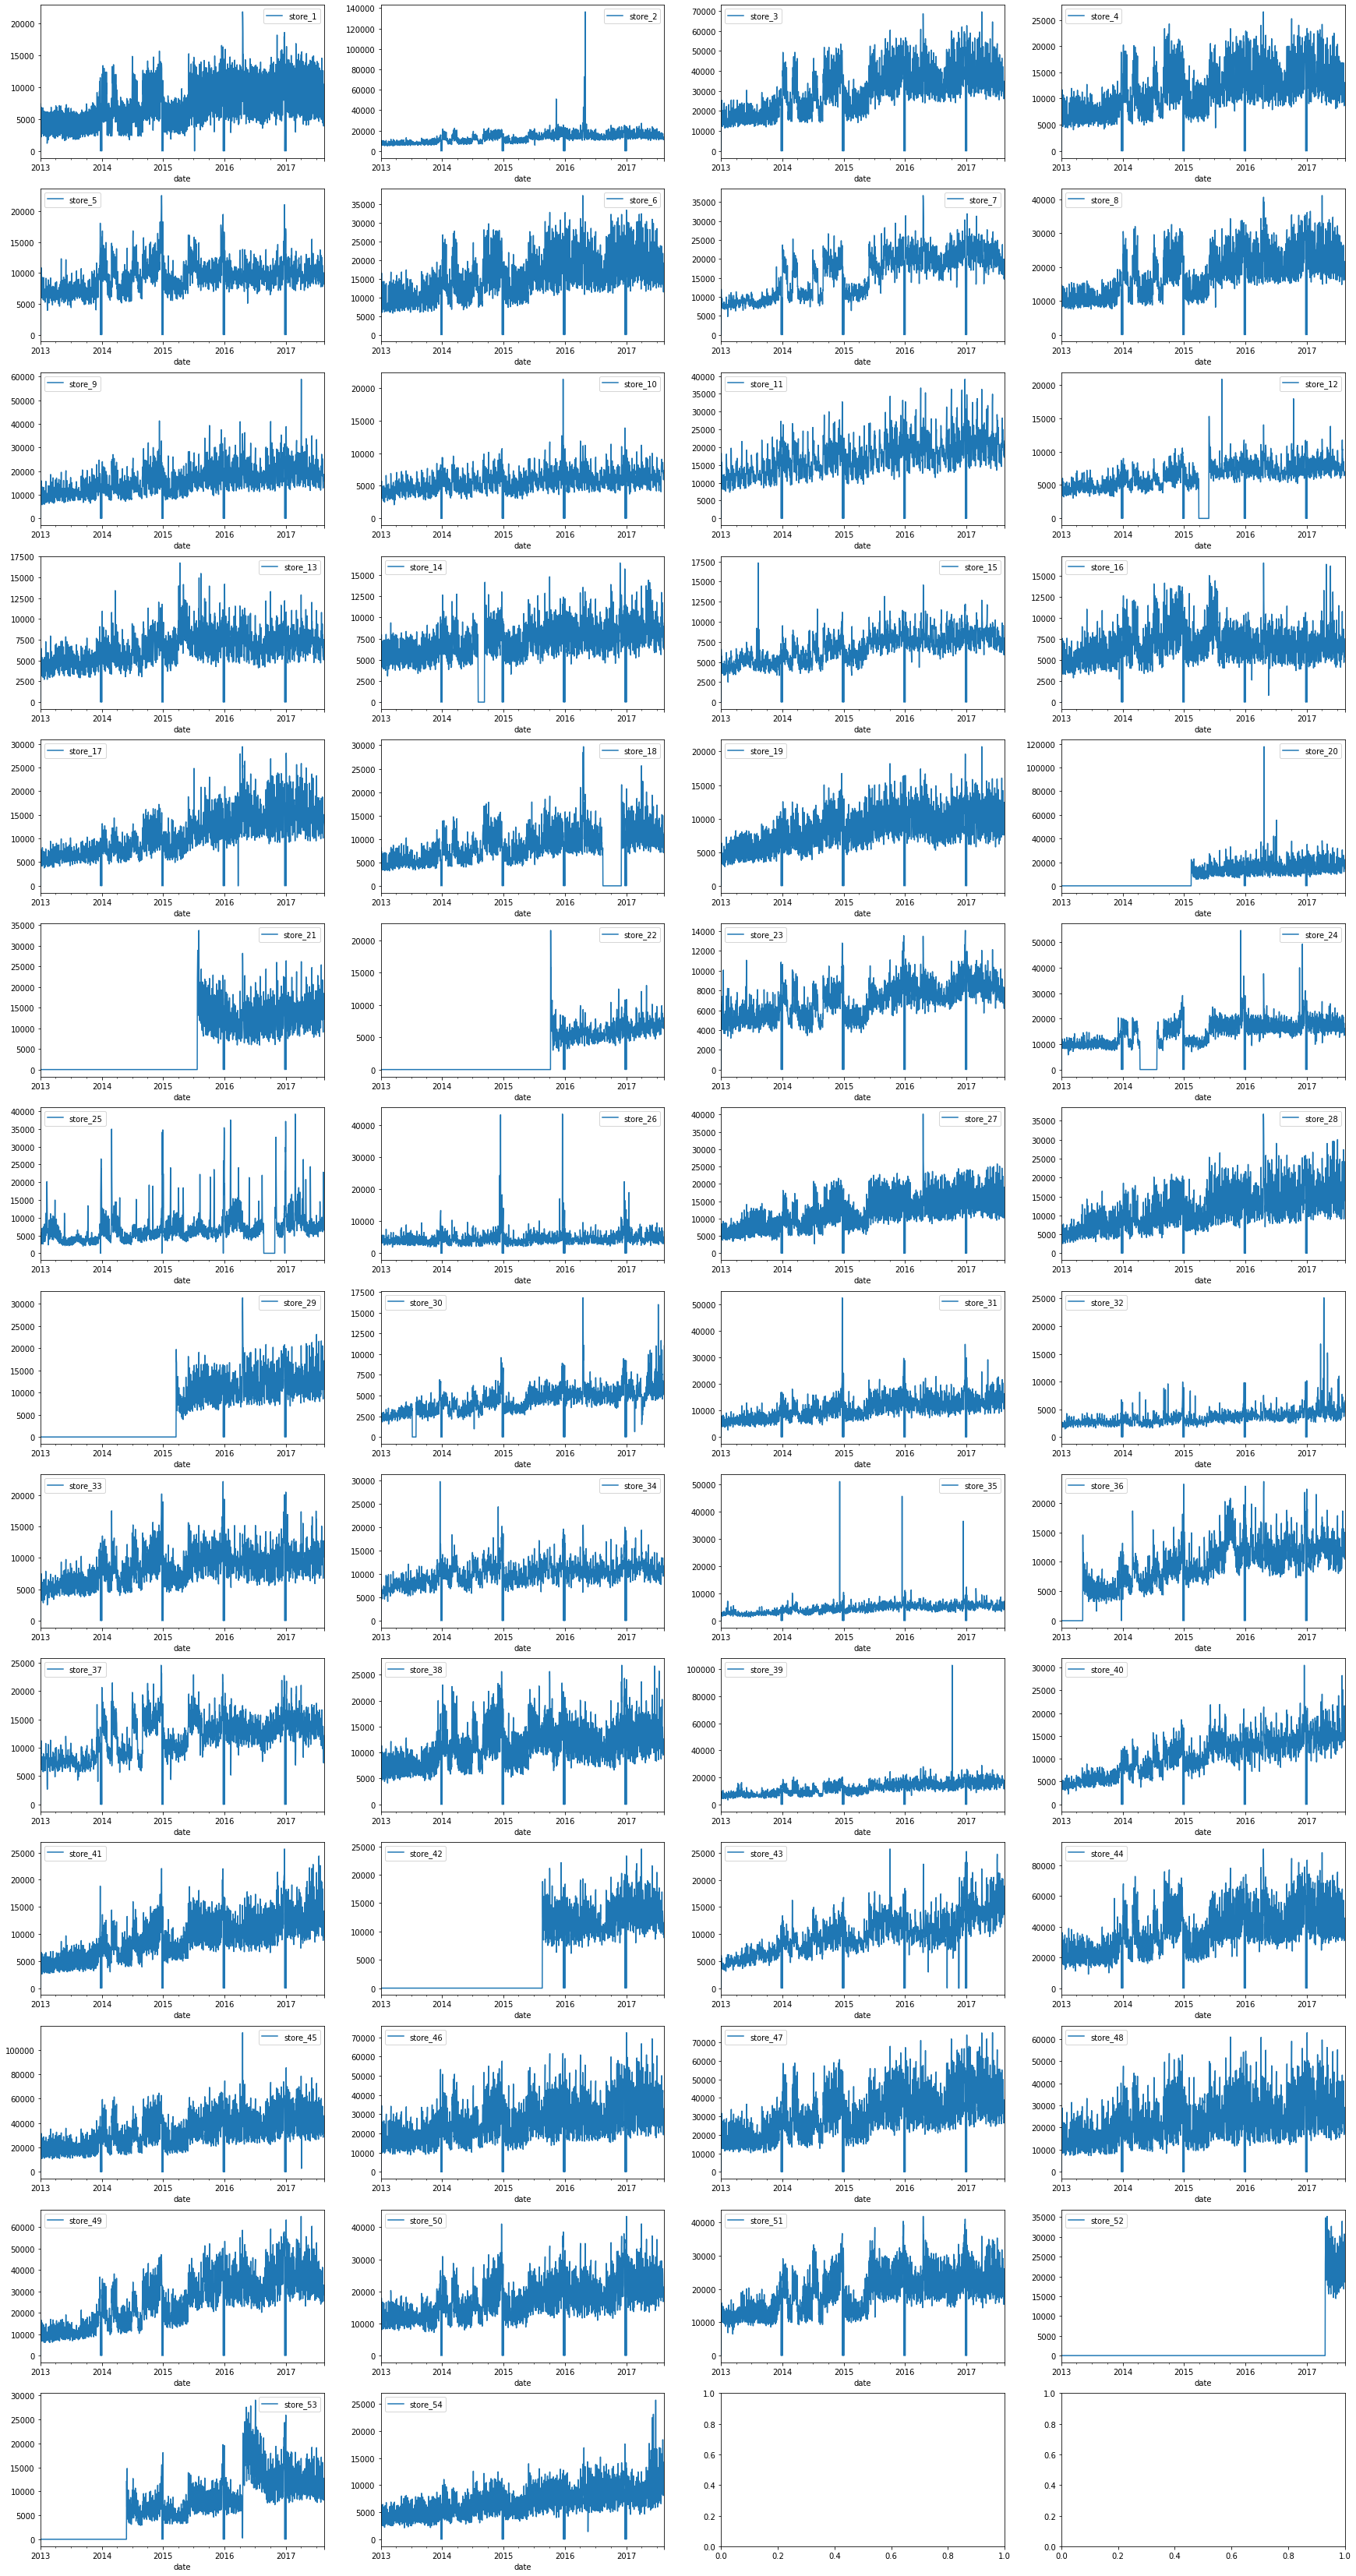

In [24]:

fig, rows = plt.subplots(nrows=14, ncols=4, figsize=(30,60))
axes = [ax for row in rows for ax in row]
for ax, store in zip(axes, per_store_df.columns):
    per_store_df[[store]].plot(ax=ax)

In [3]:
stores = df.store_nbr.unique()
families = df.family.unique()

families, stores

(array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
        'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
        'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
        'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
        'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
        'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
        'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
        'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
        'SEAFOOD'], dtype=object),
 array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
        40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
         7,  8,  9], dtype=int64))

In [37]:
from sklearn.metrics import mean_squared_log_error
test_period = 16

In [43]:
from statsmodels.tsa.api import ExponentialSmoothing

def build_run_exponential_smoothing(trend="add", seasonal="add"):
    def run_exponential_smoothing(train_df, test_df):
        np.seterr(all='ignore')
        if (trend != 'add' or seasonal != 'add'):
            train_df = train_df + 1
        model = ExponentialSmoothing(train_df, trend=trend, seasonal=seasonal).fit()
        forecast = model.forecast(test_period)
        if (trend != 'add' or seasonal != 'add'):
            forecast = forecast -1
        error = mean_squared_log_error(test_df, forecast.clip(lower=0), squared=False)
        return {'error': error, 'forecast': forecast}

    return run_exponential_smoothing

In [ ]:
from prophet import Prophet

def build_run_prophet(*prophet_args, **prophet_kwargs):
    def run_prophet(train_df, test_df):
        model = Prophet(*prophet_args, **prophet_kwargs)
        prophet_df = train_df.reset_index(level=0).rename(columns={'date': 'ds', 'sales': 'y'})
        model.fit(prophet_df)
        future_df = model.make_future_dataframe(periods=test_period)
        prediction = model.predict(future_df)
        forecast = prediction.tail(test_period).rename(columns={'ds': 'date', 'y': 'sales'}).set_index('date')[['sales']]
        error = mean_squared_log_error(test_df, forecast.clip(lower=0), squared=False)

        return {'error': error, 'forecast': forecast}

    return run_prophet

In [44]:
from itertools import product

regressions = {
    'mulmul ExponentialSmoothing': build_run_exponential_smoothing(trend="mul", seasonal="mul"),
    'addmul ExponentialSmoothing': build_run_exponential_smoothing(trend="add", seasonal="mul"),
    'muladd ExponentialSmoothing': build_run_exponential_smoothing(trend="mul", seasonal="add"),
    # 'Prophet': build_run_prophet(weekly_seasonality=True, daily_seasonality=False, yearly_seasonality=True)
}

# All methods shall return dict {'error': error, 'forecast': forecast}
# Use mean_squared_log_error(squared=False) as this is what is used in the competition

all_tests = {}
for i, (store, family) in enumerate(product(stores, families)):
    if i % 100 == 0:
        print(f'{i}/{len(stores) * len(families)}')

    store_family_df = df[(df.store_nbr == store) & (df.family == family)][['sales']].resample('D').mean().ffill()
    current_tests = {}
    for regression_name, regression_function in regressions.items():
        try:
            current_tests[regression_name] = regression_function(store_family_df.head(-test_period), store_family_df.tail(test_period))
        except Exception as e:
            print(e)
            # print('inf error')
            current_tests[regression_name] = {"error" : float('inf')}

    all_tests[(store, family)] = current_tests

#TO DO: add more regressions (idk, maybe prophet?), refactor to not have to run all regressions if we add a new one xd

0/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

100/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

200/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

300/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

400/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


500/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

600/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').
700/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

800/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

900/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1000/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1100/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1200/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1300/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1400/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1500/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1600/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

Input contains NaN, infinity or a value too large for dtype('float64').


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

1700/1782


C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\PawełWilkosz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\mod

In [45]:
all_tests

{(1,
  'AUTOMOTIVE'): {'mulmul ExponentialSmoothing': {'error': 0.5239639167364363,
   'forecast': 2017-07-31    4.526783
   2017-08-01    5.151434
   2017-08-02    4.791676
   2017-08-03    4.210322
   2017-08-04    5.074445
   2017-08-05    5.007319
   2017-08-06    2.106534
   2017-08-07    4.538399
   2017-08-08    5.164362
   2017-08-09    4.803849
   2017-08-10    4.221272
   2017-08-11    5.087212
   2017-08-12    5.019944
   2017-08-13    2.113063
   2017-08-14    4.550039
   2017-08-15    5.177318
   Freq: D, dtype: float64}, 'addmul ExponentialSmoothing': {'error': 0.523611544982817,
   'forecast': 2017-07-31    4.525537
   2017-08-01    5.150269
   2017-08-02    4.790003
   2017-08-03    4.214439
   2017-08-04    5.074044
   2017-08-05    5.003741
   2017-08-06    2.133336
   2017-08-07    4.538145
   2017-08-08    5.164299
   2017-08-09    4.803207
   2017-08-10    4.226325
   2017-08-11    5.087885
   2017-08-12    5.017418
   2017-08-13    2.140472
   2017-08-14    4.5507

In [46]:
[x['error'] for d in all_tests.values() for x in d.values()]

[0.5239639167364363,
 0.523611544982817,
 0.5182411286779718,
 0.0,
 4.509747244882932e-16,
 0.0,
 0.41461401828775146,
 0.41451059682218294,
 0.4112897819898643,
 0.26397634384010144,
 0.29737532237665776,
 0.2539677022214842,
 0.18239731880075327,
 0.1879124306209427,
 0.18009573425868358,
 0.27080487783025836,
 0.26970307918082953,
 0.27625655720705344,
 1.068477093107887,
 0.9285663322459452,
 0.8964882837438829,
 0.29632575998376925,
 0.2893060562163815,
 0.29343373138748213,
 0.24709634030001407,
 0.24595981695890154,
 0.23856261982606916,
 0.29418028655093315,
 0.2937811823486164,
 0.29642467666043265,
 0.23672534314184313,
 0.2359436615692469,
 0.23425546951959725,
 0.2945773610228133,
 0.2918809695133863,
 0.2965758348532132,
 0.20936627705407967,
 0.20873389352686672,
 0.21966638320793264,
 0.467051857746857,
 0.44870379115933895,
 0.4489455719204533,
 0.6416928057431527,
 0.6439781116094065,
 0.645599081945297,
 0.4963398051353816,
 0.4958181192270992,
 0.4990025646858691,
 

In [47]:
import pickle

with open('./mul.p', 'wb') as f:
    pickle.dump(all_tests, f)